In [147]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

In [148]:
df = pd.read_csv('AutoTel.csv')
df = df.drop(['inactive'], axis=1)
df.head()

,activeCarHere,capacity,carsList,distance,id,latitude,longitude,modelsList,parkingAddress,showMarker,timestamp,total_cars,typeId
0,True,NaN,[53],4.6,63016480,32.04349,34.78069,[10],"[{'languageId': 0, 'text': 'אחרון 21, תל אביב ...",True,2019-01-10 09:09:43.245166 UTC,1,NaN
1,True,NaN,[53],4.6,84487389,32.04349,34.78069,[10],"[{'languageId': 0, 'text': 'אחרון 21, תל אביב ...",True,2019-01-10 09:11:48.173801 UTC,1,NaN
2,True,NaN,[53],4.6,46688801,32.04349,34.78069,[10],"[{'languageId': 0, 'text': 'אחרון 21, תל אביב ...",True,2019-01-10 09:13:53.222656 UTC,1,NaN
3,True,NaN,[53],4.6,18964470,32.04349,34.78069,[10],"[{'languageId': 0, 'text': 'אחרון 21, תל אביב ...",True,2019-01-10 09:15:58.332911 UTC,1,NaN
4,True,NaN,[53],4.6,83417014,32.04349,34.78069,[10],"[{'languageId': 0, 'text': 'אחרון 21, תל אביב ...",True,2019-01-10 09:18:03.222304 UTC,1,NaN


In [149]:
#df1 = df[ df['capacity'].notnull()]


#df.id.value_counts(dropna=False)
df['carsList'].unique()
#print(len(df['carsList'].unique()))

array(['[53]', '[56]', '[]', '[142]', '[183]', '[171]', '[116, 171]',
       '[62]', '[146]', '[241]', '[100]', '[17, 100]', '[17]', '[67]',
       '[67, 117]', '[76]', '[66]', '[226]'], dtype=object)

In [150]:
df.id.unique().shape
grouped = df.groupby(['id'])#.agg(['count'])

ids_used_1 = grouped.filter(lambda x: x['id'].count() == 1).id
list(ids_used_1)
#df = df[df.id.isin(list(ids_used_1))]
df.shape

(1000, 13)

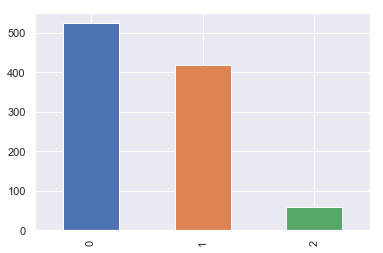

In [151]:
import matplotlib.pyplot as plt
#df.carsList.value_counts().plot(kind='bar')
df.total_cars.value_counts(dropna=False).plot(kind='bar')

17


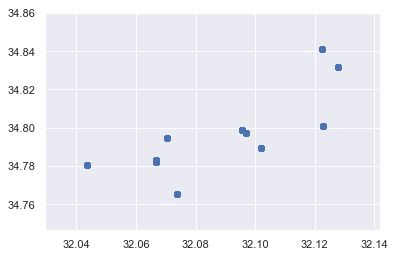

In [152]:

from collections import Counter
c = Counter(zip(df.latitude,df.longitude))
print(len(c))
s = [1*c[(xx,yy)] for xx,yy in zip(df.latitude, df.longitude)]
plt.scatter(df.latitude, df.longitude)

In [153]:
df['coord'] = df.latitude.map(str) + ', ' + df.longitude.map(str)

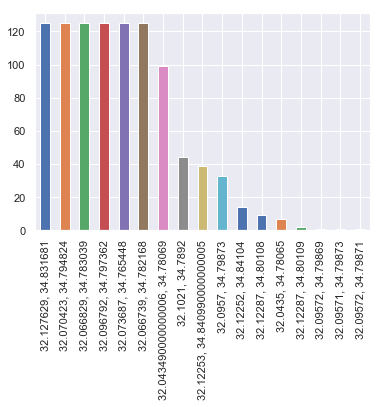

In [154]:
df.coord.value_counts(dropna=False).plot(kind='bar')

In [155]:
df_cars_by_time = df.groupby('timestamp').agg({'total_cars':'sum'}).reset_index()
df_cars_by_time.sample(5)

,timestamp,total_cars
75,2019-01-10 11:45:55.070781 UTC,5
113,2019-01-10 13:05:05.100979 UTC,3
102,2019-01-10 12:42:10.963106 UTC,4
31,2019-01-10 10:14:17.415631 UTC,4
87,2019-01-10 12:10:53.874508 UTC,5


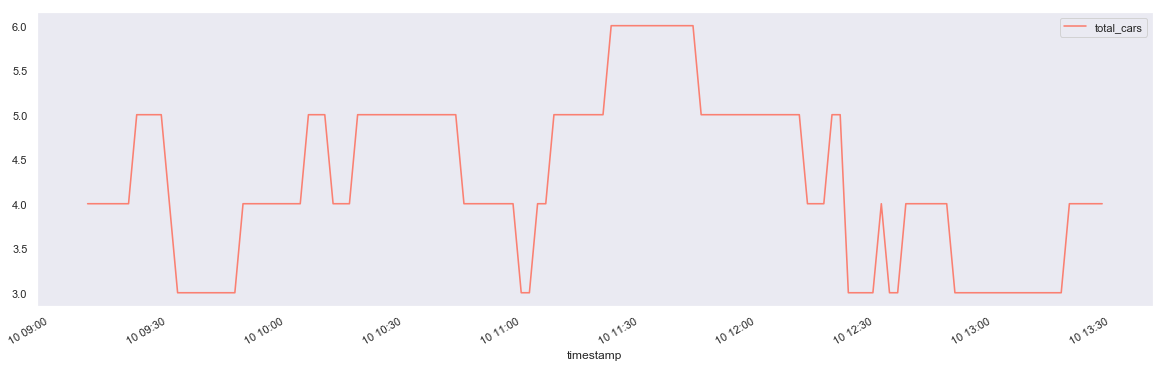

In [158]:
df_cars_by_time['timestamp'] = df_cars_by_time['timestamp'].apply(pd.Timestamp)
df_cars_by_time.set_index('timestamp').sort_index().rolling('1min').mean().plot(figsize=(20,6), c='salmon', lw=1.6)
plt.grid()
plt.show()

In [160]:
# Convert timezone
timestamps = pd.DatetimeIndex(df_cars_by_time['timestamp'])
timestamps = timestamps.tz_convert('Asia/Jerusalem')

df_cars_by_time['local_time'] = timestamps

#Extract time features
df_cars_by_time['weekday'] = df_cars_by_time['local_time'].dt.weekday_name
df_cars_by_time['hour'] = df_cars_by_time['local_time'].dt.hour
df_cars_by_time.head() 

,timestamp,total_cars,local_time,weekday,hour
0,2019-01-10 09:09:43.245166+00:00,4,2019-01-10 11:09:43.245166+02:00,Thursday,11
1,2019-01-10 09:11:48.173801+00:00,4,2019-01-10 11:11:48.173801+02:00,Thursday,11
2,2019-01-10 09:13:53.222656+00:00,4,2019-01-10 11:13:53.222656+02:00,Thursday,11
3,2019-01-10 09:15:58.332911+00:00,4,2019-01-10 11:15:58.332911+02:00,Thursday,11
4,2019-01-10 09:18:03.222304+00:00,4,2019-01-10 11:18:03.222304+02:00,Thursday,11


In [161]:
df_cars_by_time['weekday'].value_counts()


Thursday    125
Name: weekday, dtype: int64

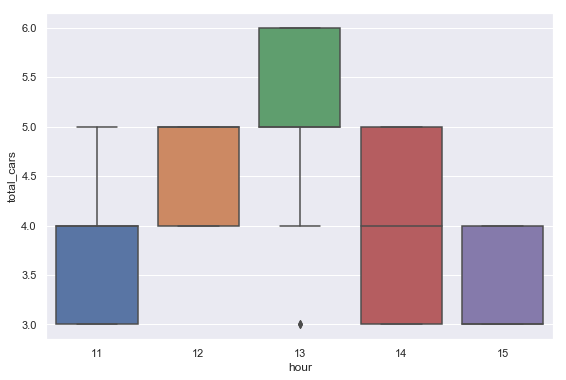

In [163]:
plt.figure(figsize=(20,6))
plt.subplot(121)
sns.boxplot(x='hour', y='total_cars', data=df_cars_by_time)